In [148]:
from math import log
import matplotlib.pyplot as plt
import numpy as np

In [149]:
c0=1
beta=3
k_1=list(range(1,11))
k_2=list(range(1,101))
y_1=[]
y_2=[]
for k_val in k_1:
   y_1.append(c0*k_val**(-beta))
for k_val in k_2:
   y_2.append(c0*k_val**(-beta))

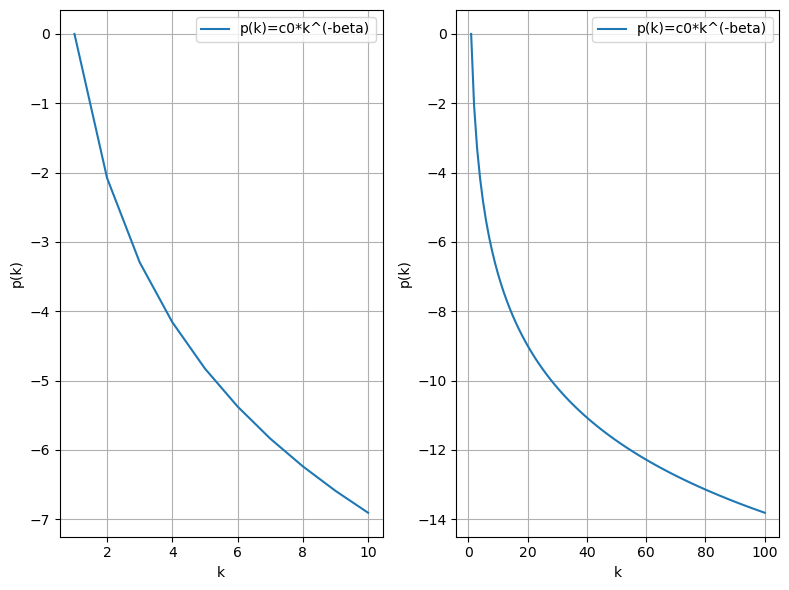

In [230]:
fig,ax=plt.subplots(1,2,figsize=(8,6))
ax[0].plot(k_1,y_1,label='p(k)=c0*k^(-beta)')
ax[1].plot(k_2,y_2,label='p(k)=c0*k^(-beta)')
ax[0].set_ylabel('p(k)')
ax[0].set_xlabel('k')
ax[1].set_ylabel('p(k)')
ax[1].set_xlabel('k')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[0].grid()
ax[1].grid()
plt.tight_layout()
plt.show()

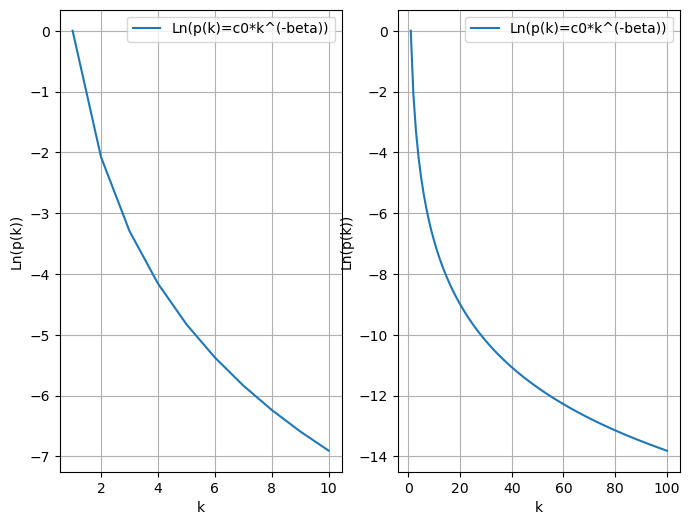

In [151]:
y_1 = []
y_2 = []
for k_val in k_1:
   y_1.append(log(c0 * k_val ** (-beta)))
for k_val in k_2:
   y_2.append(log(c0 * k_val ** (-beta)))
fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].plot(k_1, y_1, label='Ln(p(k)=c0*k^(-beta))')
ax[1].plot(k_2, y_2, label='Ln(p(k)=c0*k^(-beta))')
ax[0].set_ylabel('Ln(p(k))')
ax[0].set_xlabel('k')
ax[1].set_ylabel('Ln(p(k))')
ax[1].set_xlabel('k')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[0].grid()
ax[1].grid()
plt.show()

In [214]:
with open('martrix.txt','r') as file:
    lines=file.readlines()
lines

["1 ['2', '3']\n",
 "2 ['1', '3', '4', '5']\n",
 "3 ['1', '2', '5', '7', '8']\n",
 "4 ['2', '5']\n",
 "5 ['2', '3', '4', '6']\n",
 "6 ['5']\n",
 "7 ['3', '8']\n",
 "8 ['3', '7']\n",
 "9 ['10']\n",
 "10 ['9', '11']\n",
 "11 ['10']"]

In [215]:
import re
def extract(s):
    pattern=r'\'[^\']*\''
    res=re.findall(pattern,s)
    res=list(map(lambda x:int(x.strip('\'')),res))
    return res
martrix=[]
for line in lines:
    str=extract(line)
    martrix.append(str)
martrix

[[2, 3],
 [1, 3, 4, 5],
 [1, 2, 5, 7, 8],
 [2, 5],
 [2, 3, 4, 6],
 [5],
 [3, 8],
 [3, 7],
 [10],
 [9, 11],
 [10]]

In [216]:
i=martrix.__len__()
m=np.eye(i)
print(m)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [217]:
for k,num in zip(martrix,range(0,i)):
    start=num
    for t in k:
        m[start][t-1]=1
print(m)    

[[1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0.]
 [0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]]


In [231]:
m_=m
np.savetxt("Martrix 0.txt",m,fmt='%-7d',delimiter='\t',newline='\n')
martix_list=[m]
for i in range(1,11):
    m_=np.dot(m_,m)
    filename=f"Martrix {i}.txt"
    np.savetxt(filename,m_,fmt='%-7d',delimiter='\t',newline='\n')